In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 글꼴 설정
font_path = "C:\Windows\Fonts\H2HDRM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 가져오기
file_path = "../day03/시도별 전출입 인구수.xlsx"
df = pd.read_excel(file_path, header=0)
df = df.fillna(method='ffill')

# 파일에서 서울에서 전입지별만 뽑아오기
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 인덱스의자료형바꾸기
df_4.index=df_4.index.map(int)
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


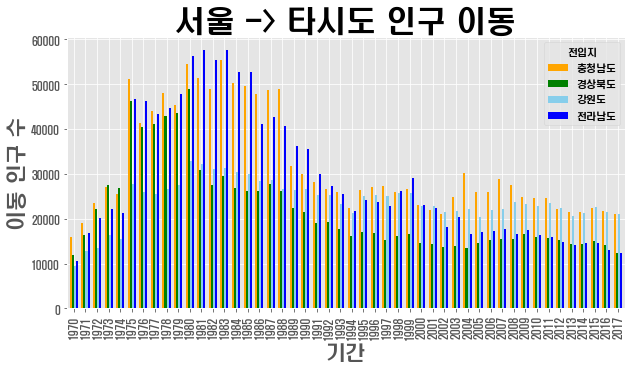

In [5]:
df_4.plot(kind='bar', figsize=(10, 5), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title("서울 -> 타시도 인구 이동", size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.show()

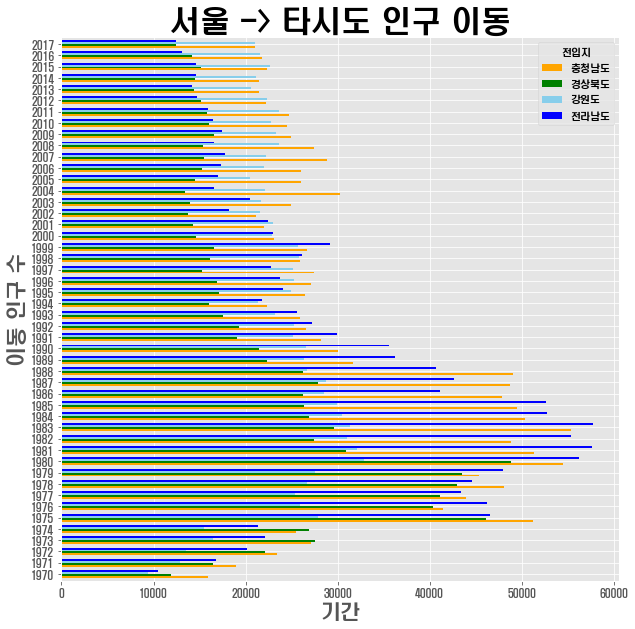

In [7]:
df_4.plot(kind='barh', figsize=(10, 10), width=0.7,
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title("서울 -> 타시도 인구 이동", size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.show()

In [10]:
df_4['합계'] = df_4.sum(axis=1)
df_4

전입지,충청남도,경상북도,강원도,전라남도,합계
1970,15954,11868,9352,10513,95374.0
1971,18943,16459,12885,16755,130084.0
1972,23406,22073,13561,20157,158394.0
1973,27139,27531,16481,22160,186622.0
1974,25509,26902,15479,21314,178408.0
1975,51205,46177,27837,46610,343658.0
1976,41447,40376,25927,46251,308002.0
1977,43993,41155,25415,43430,307986.0
1978,48091,42940,26700,44624,324710.0
1979,45388,43565,27599,47934,328972.0


In [13]:
df_total = df_4[['합계']].sort_values(by='합계', ascending=0)
df_total

전입지,합계
1980,384856.0
1983,347980.0
1981,344116.0
1975,343658.0
1979,328972.0
1982,325390.0
1978,324710.0
1984,320818.0
1985,316714.0
1976,308002.0
